# CARNEGIE MELLON UNIVERSITY

**Name**: Junxiao Guo

**Andrew ID**: junxiaog

**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)

**ASSIGNMENT 3**

In [1]:
%config IPCompleter.greedy=True
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.dates as mdates


## Quesiont 1

In [2]:
hypo_mean = 7725
calorie_stat = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
sample_mean,sample_std,sample_ste = np.mean(calorie_stat),np.std(calorie_stat),stats.sem(calorie_stat)
# t_stat,pval = stats.ttest_1samp(calorie_stat,ret_mean)
# t_stat = np.abs(sample_mean - hypo_mean) / ((sample_std)/np.sqrt(len(calorie_stat)))
dof = len(calorie_stat)-1
# pval =2*(1 - stats.t.cdf(calorie_stat,df=dof))

t_stat,pval = stats.ttest_1samp(calorie_stat,hypo_mean)

print("Mean: {}\nStandard Deviation: {}\nStandard Error of the Mean: {}".format(sample_mean,sample_std,sample_ste))
print("Degrees of Freedom: {}  \nt-statistic: {} \nP Value:{}  ".format(dof,t_stat,pval))
# reject = True if t_stat == pval else False


Mean: 6753.636363636364
Standard Deviation: 1088.9717646166182
Standard Error of the Mean: 344.3631083801271
Degrees of Freedom: 10  
t-statistic: -2.8207540608310198 
P Value:0.018137235176105812  


### Answer 1

- Mean: 6753.636363636364

- Standard Deviation: 1088.9717646166182

- Standard Error of the Mean: 344.3631083801271

- Degrees of Freedom: 10  

- t-statistic: -2.8207540608310198 

- P Value:0.018137235176105812  

- Since the data comes from a normal distribution, and the mean value is about 6753KJ (which is smaller than 7725KJ), a **left tail test** is appropriate.
- Because the P value is pretty small, the null hypothesis should be rejected.



## Question 2

In [3]:
class Ireland():
    def __init__(self):
        self.sample_size = 42
        self.mean = 74
        self.std = 7.4
class Elsewhere():
    def __init__(self):
        self.sample_size = 61
        self.mean = 57
        self.std = 7.1
        
ire = Ireland()
elsw = Elsewhere()
t, p = scipy.stats.ttest_ind_from_stats(mean1=ire.mean,mean2=elsw.mean,std1=ire.std,std2=elsw.std,nobs1=ire.sample_size,nobs2=elsw.sample_size,equal_var=False)
### With formula
t2 = (ire.mean-elsw.mean)/(np.sqrt((np.power(ire.std,2)/ire.sample_size)+(np.power(elsw.std,2)/elsw.sample_size)))

assert t == t2 , 't score are not the same!'
print("t-score: {} \np-value: {}".format(t,p))


 

t-score: 11.647653131319812 
p-value: 2.315890162874227e-19


### Answer 2

- t-score: 11.647653131319812 
- p-value: 2.315890162874227e-19
- A **two-sample test** is appropriate since  the GOES of Ireland and Elsewhere are independent to each other.
- A right tail is appropriate since the test is about test if the GOES in Irish pub tastes **significantly better** than elsewhere around the globe.


## Question 3

                gdp  fertility
gdp        1.000000  -0.537393
fertility -0.537393   1.000000


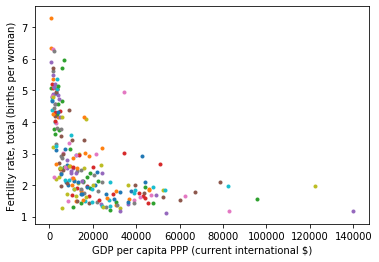

In [20]:
from scipy.stats import pearsonr

f_gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039.csv',skiprows=4)
f_fert = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225.csv',skiprows=4)
codeArr = f_gdp['Country Code']
assert list(f_gdp['Country Code']) == list(f_fert['Country Code']), "Country Code doesn't match"
gdp,fertility = f_gdp['2013'],f_fert['2013']
newdata = {"gdp":gdp,"fertility":fertility}
newdf = pd.DataFrame(newdata)
coef = newdf.corr()
print(coef)
assert len(gdp) == len(fertility), "lengh of two arrays has changed"
for i,j in zip(gdp,fertility):
    plt.scatter(i,j,marker='.')
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('GDP per capita PPP (current international $)')
plt.show()
assert len(gdp) == len(fertility), '2013 stat lenght are not the same'
gdp_mean,fert_mean = np.mean(gdp),np.mean(fertility)
gdp_std,fert_std = np.std(gdp),np.std(fertility)
corr_coefficient = (1/(len(gdp)))*np.sum((gdp-gdp_mean)*(fertility-fert_mean))


## Answer 3

- Correlation Coefficient = -0.537393
- Interpolation: The result is showing a **Negative Correlation** which menas the higher rate of fertility somehow leads to lower GDP percapita and vise versa.
 


## Question 4

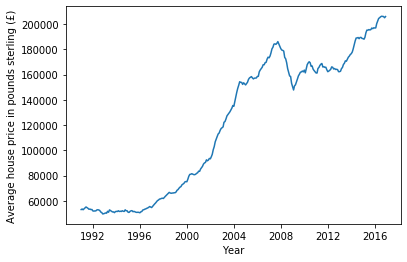

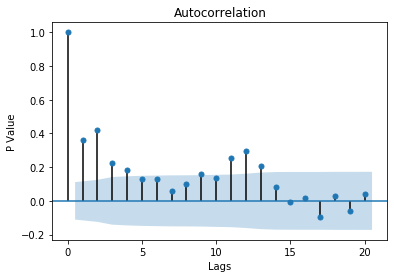

0.057661230215616824


In [26]:
f_monthly = pd.read_excel('monthly.xls',sheet_name='Monthly')
time,price = f_monthly['Unnamed: 0'],f_monthly['Average House Price']
pos = f_monthly.loc[f_monthly['Unnamed: 0'] == '2016-12-01'].index[0]
time,price = time[:pos+1],price[:pos+1]
plt.plot_date(time,price,'-')
plt.xlabel("Year")
plt.ylabel("Average house price in pounds sterling (£)")
plt.show()

###########
mrt = []
for i in range (1,len(price)):
    mrt.append((price[i]-price[i-1])/price[i-1])

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(np.array(mrt),lags=20,alpha=0.05)
plt.xlabel("Lags")
plt.ylabel("P Value")
plt.show()



art = []
for i in range (12,len(price)):
    art.append((price[i]-price[i-12])/price[i-12])
print(np.mean(art))


## ANSWER 4

Anualized Return = 0.057661230215616824



## Question 5


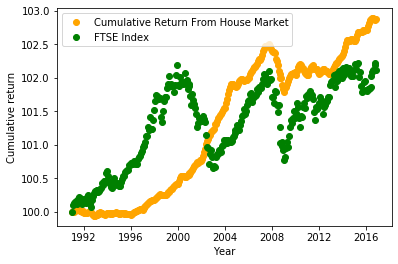

0.0498159299296903


In [6]:
def get_cumulative(arr):
    daily_return = []
    prev_return = arr[0]
    for i in range(1,len(arr)):
        daily_return.append((arr[i]-arr[i-1])/arr[i-1])
    tmp = [k+1 for k in daily_return]
    return np.cumprod(tmp) - 1

f_ftse = pd.read_csv('FTSE100.csv')
ftse_date,ftse_index = f_ftse['Date'].astype('datetime64[ns]') ,f_ftse['Adj Close']
newftse_index = list(ftse_index[::-1])

a,b = get_cumulative(price),get_cumulative(newftse_index)

ftse_date = ftse_date[::-1]
newa = [(100+k) for k in a]
newb = [(100+k) for k in b]
newa.insert(0,100)
newb.insert(0,100)

plt.plot_date(time,newa,label='Cumulative Return From House Market',color='orange')
plt.plot_date(ftse_date,newb,label='FTSE Index',color='green')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Cumulative return")
plt.show()

# print(newb)

# print(newb)
art2 = []
for i in range (12,len(newb)):
#     print(((newb[i]-newb[i-12])/newb[i-12]))
    art2.append((newftse_index[i]-newftse_index[i-12])/newftse_index[i-12])
print(np.mean(art2))

### ANSWER 5

- Average Anualized Return from the FTSE100 = 0.0498159299296903
- It would be better if invested housing at that time